In [1]:
import requests

requests.packages.urllib3.disable_warnings()

import ssl

 

try:

    _create_unverified_https_context = ssl._create_unverified_context

except AttributeError:

    # Legacy Python that doesn't verify HTTPS certificates by default

    pass

else:

    # Handle target environment that doesn't support HTTPS verification

    ssl._create_default_https_context = _create_unverified_https_context



In [2]:
import tensorflow as tf
import keras    
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


학습데이터 셋의 수 : 60000
테스트데이터 셋의 수 : 10000
이미지의 크기: 28 X 28
정답의 예: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
학습 이미지의 예: 
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 17

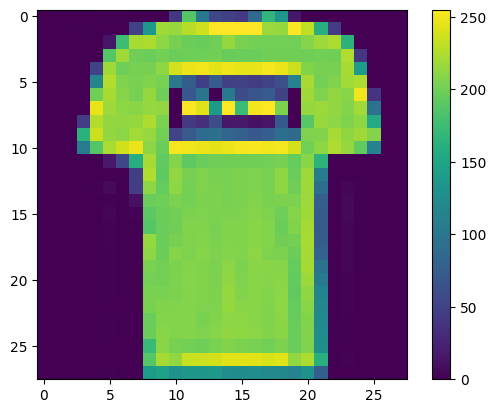

In [6]:
print("학습데이터 셋의 수 : %d" %train_images.shape[0])
print("테스트데이터 셋의 수 : %d" %test_images.shape[0])
print("이미지의 크기: %d X %d" %(train_images.shape[1], train_images.shape[2]))
print("정답의 예: %s" %str(train_labels[:20]))
print("학습 이미지의 예: \n%s" %str(train_images[1]))
plt.figure()
plt.imshow(train_images[1]) #이미지데이터 시각화
plt.colorbar() #colorbar 표시
plt.grid(False) #격자선 표시 안함
plt.show()

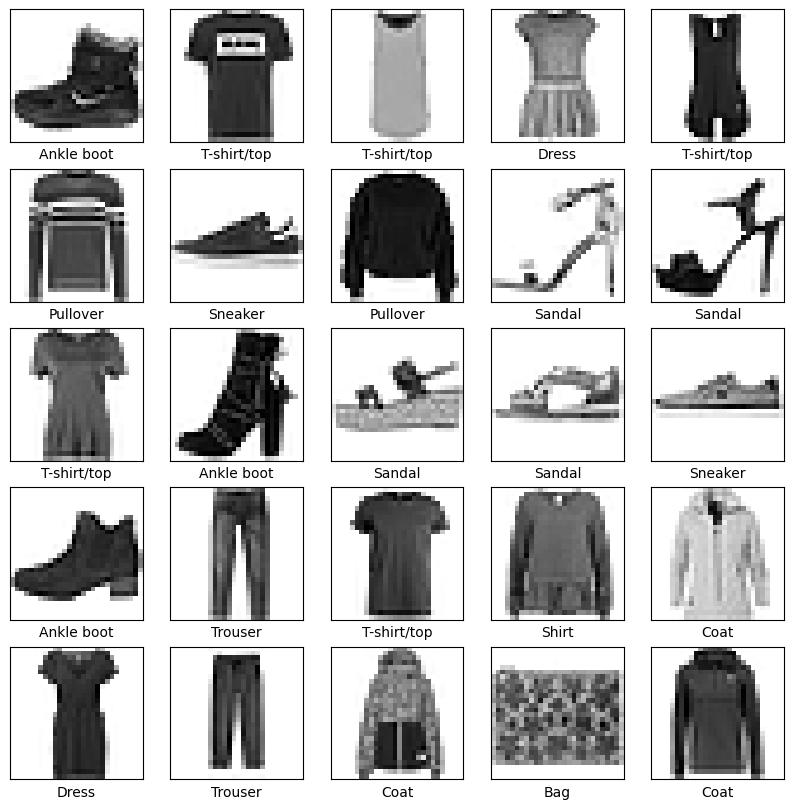

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    keras.layers.MaxPool2D(strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8014 - loss: 0.5621 - val_accuracy: 0.8758 - val_loss: 0.3411
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8956 - loss: 0.2860 - val_accuracy: 0.8824 - val_loss: 0.3203
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9153 - loss: 0.2330 - val_accuracy: 0.8943 - val_loss: 0.3077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.1974 - val_accuracy: 0.9021 - val_loss: 0.2817
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9360 - loss: 0.1759 - val_accuracy: 0.9064 - val_loss: 0.2793


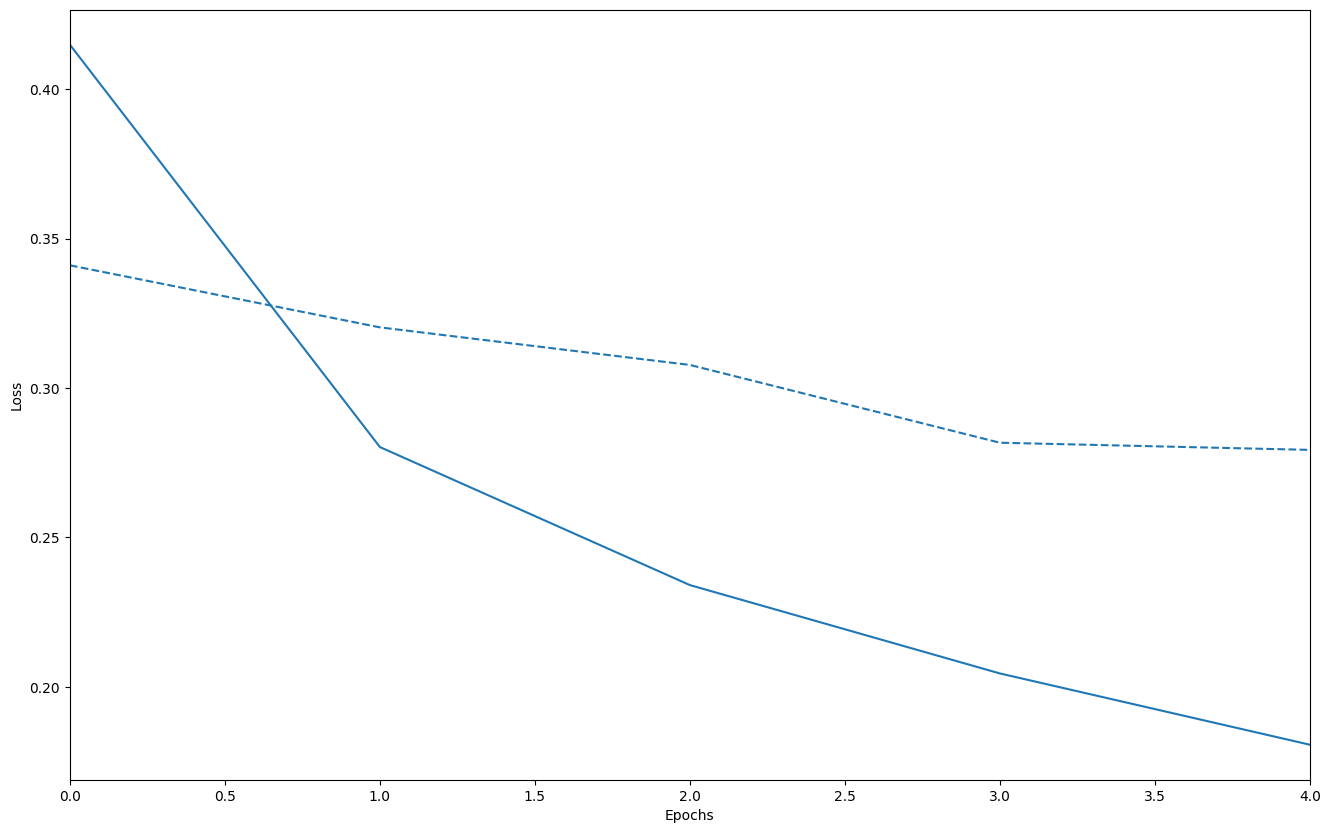

In [14]:
def plot_loss(history):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_loss'],
                   '--', label='Test')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(), label='Train')

    plt.xlabel('Epochs')
    plt.ylabel("Loss")

    plt.xlim([0,max(history.epoch)])
plot_loss(history) 

In [15]:
def evaluation_model(model):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print("정확도 :", test_accuracy)

evaluation_model(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9087 - loss: 0.2848
정확도 : 0.9064000248908997
